#### 1) Calories_consumed-> predict weight gained using calories consumed
#### dataset = calories_consumed.csv
y - continuous(dependent), x - single & continuos(independent)
==> y - Weight gained (grams), x - Calories Consumed
#### So, We go simple linear regression

### Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Reading csv file using pandas library

In [2]:
wg_cc=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\simple linear\\calories_consumed.csv")

### EDA

In [3]:
wg_cc.head()

,wg,cc
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
wg_cc.corr()

,wg,cc
wg,1.000000,0.946991
cc,0.946991,1.000000


Text(0,0.5,'Weight gained (grams)')

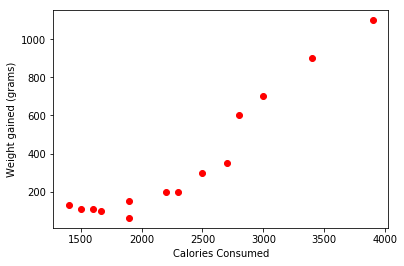

In [5]:
plt.scatter(x=wg_cc.cc, y=wg_cc.wg, color='red')
plt.xlabel("Calories Consumed")
plt.ylabel("Weight gained (grams)")

In [6]:
wg_cc.describe()

,wg,cc
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


###  Importing  statsmodels.formula.api for linear regression model

In [7]:
import statsmodels.formula.api as smf

In [8]:
model=smf.ols("wg~cc",data=wg_cc).fit()

In [9]:
model.params

Intercept   -625.752356
cc             0.420157
dtype: float64

In [10]:
model.summary()

C:\Users\Raja\Anaconda33\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.86e-07
Time:                        18:14:56   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
cc             0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-845.426655,-406.078057
cc,0.330506,0.509807


In [12]:
pred = model.predict(wg_cc) # Predicted values of wg using the model

#### Visualization of regresion line over the scatter plot of wg & cc

Text(0,0.5,'Weight gained (grams)')

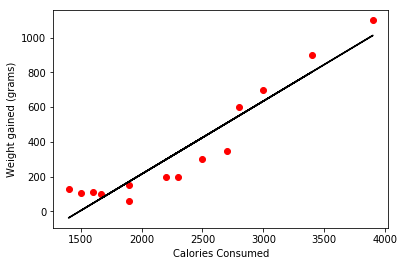

In [13]:
plt.scatter(x=wg_cc.cc, y=wg_cc.wg, color='red')
plt.plot(wg_cc.cc, pred,color='black')
plt.xlabel("Calories Consumed")
plt.ylabel("Weight gained (grams)")

In [14]:
pred.corr(wg_cc.wg) # 0.81

0.9469910088554457

### Transforming variables for accuracy

In [15]:
model1 = smf.ols('wg~np.log(cc)',data=wg_cc).fit()

In [16]:
model1.params

Intercept    -6955.650125
np.log(cc)     948.371723
dtype: float64

In [17]:
model1.summary()

C:\Users\Raja\Anaconda33\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.25e-05
Time:                        18:14:57   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(cc)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model1.conf_int(0.01)

,0,1
Intercept,-10104.600246,-3806.700004
np.log(cc),540.345229,1356.398218


In [19]:
pred1 = model1.predict(wg_cc)

In [20]:
pred1.corr(wg_cc.wg)

0.8987252805287711

### Model having highest R-Squared value is better i.e. (model=0.897 is better than model1=0.808). There has good relationship>0.85

========================================================================================================================

#### 2) Delivery_time -> Predict delivery time using sorting time 
#### dataset = delivery_time.csv
y - continuous(dependent), x - single & continuos(independent)
==> y - delivery time, x - sorting time
#### So, We go simple linear regression

### Reading csv file using pandas library

In [21]:
dt_st=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\simple linear\\delivery_time.csv")

### EDA

In [22]:
dt_st.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
dt_st.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0,0.5,'Delivery time')

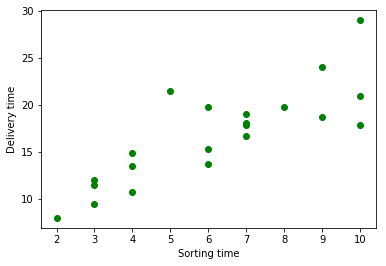

In [24]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x1715aa31c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1715aa3c518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1715aa316a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1715aa3cd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1715aa3ce80>],
 'means': []}

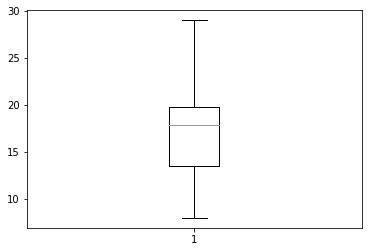

In [25]:
plt.boxplot(dt_st.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <a list of 5 Patch objects>)

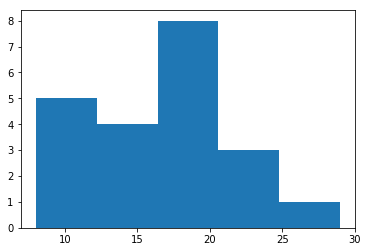

In [26]:
plt.hist(dt_st.dt, bins=5)

In [27]:
model2=smf.ols("dt~st",data=dt_st).fit()

In [28]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           3.98e-06
Time:                        18:14:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model3=smf.ols("dt~np.log(st)",data=dt_st).fit()

In [31]:
model3.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.64e-06
Time:                        18:14:59   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [34]:
model3.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [35]:
pred2 = model2.predict(dt_st) # Predicted values of dt using the model

In [36]:
pred3 = model3.predict(dt_st) # Predicted values of dt using the model

Text(0,0.5,'Delivery time')

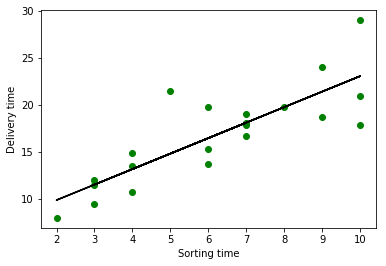

In [37]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='green')
plt.plot(dt_st.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0,0.5,'Delivery time')

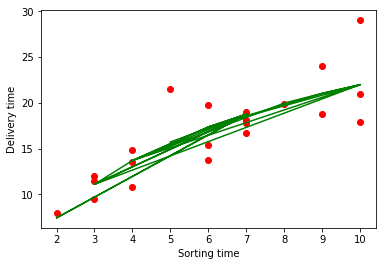

In [38]:
plt.scatter(x=dt_st.st, y=dt_st.dt, color='red')
plt.plot(dt_st.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

### Model3 is slightly better than Model2 and has moderate corelation.

=======================================================================================================================

#### 3) Emp_data -> Build a prediction model for Churn_out_rate 
#### dataset = emp_data.csv
y - continuous(dependent), x - single & continuos(independent)
==> y - Churn_out_rate , x - Salary_hike


### Reading csv file using pandas library

In [39]:
sal_churn=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\simple linear\\emp_data.csv")

### EDA

In [40]:
sal_churn.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [41]:
sal_churn.corr()

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


Text(0,0.5,'Churn_out_rate')

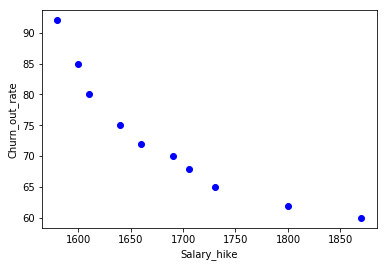

In [42]:
plt.scatter(x=sal_churn.Salary_hike, y=sal_churn.Churn_out_rate, color='blue')
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")

(array([2., 1., 2., 1., 1., 1., 0., 1., 0., 1.]),
 array([1580., 1609., 1638., 1667., 1696., 1725., 1754., 1783., 1812.,
        1841., 1870.]),
 <a list of 10 Patch objects>)

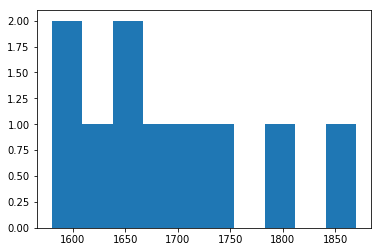

In [43]:
plt.hist(sal_churn.Salary_hike)

(array([2., 1., 1., 2., 1., 0., 1., 1., 0., 1.]),
 array([60. , 63.2, 66.4, 69.6, 72.8, 76. , 79.2, 82.4, 85.6, 88.8, 92. ]),
 <a list of 10 Patch objects>)

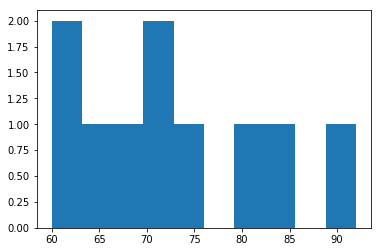

In [44]:
plt.hist(sal_churn.Churn_out_rate)

#### If |r| is greater than  0.85 then Co-relation is Strong(Correlation Co-efficient = -0.911722). 
##### This has a strong negative Correlation 

In [45]:
sal_churn.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


#### Simple model without using any transformation

In [46]:
model4=smf.ols("Churn_out_rate~Salary_hike",data=sal_churn).fit()

In [47]:
model4.summary()

C:\Users\Raja\Anaconda33\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           0.000239
Time:                        18:15:01   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
model4.params

Intercept      244.364911
Salary_hike     -0.101543
dtype: float64

In [49]:
model4.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,181.291232,307.438591
Salary_hike,-0.138845,-0.064240


In [50]:
pred4 = model4.predict(sal_churn) # Predicted values of Churn_out_rate using the model

In [51]:
model5=smf.ols("Churn_out_rate~np.log(Salary_hike)",data=sal_churn).fit()

In [52]:
model5.summary()

C:\Users\Raja\Anaconda33\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           0.000153
Time:                        18:15:02   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model5.params

Intercept              1381.456193
np.log(Salary_hike)    -176.109735
dtype: float64

In [54]:
model5.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,930.858413,1832.053972
np.log(Salary_hike),-236.751223,-115.468248


In [55]:
pred5 = model5.predict(sal_churn) # Predicted values of Churn_out_rate using the model

Text(0,0.5,'Churn_out_rate')

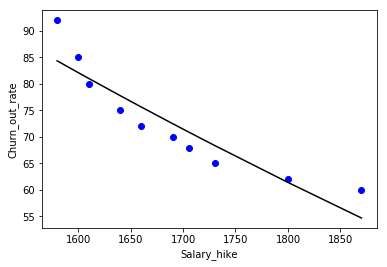

In [56]:
plt.scatter(x=sal_churn.Salary_hike, y=sal_churn.Churn_out_rate, color='blue')
plt.plot(sal_churn.Salary_hike, pred5,color='black')
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")

#### Model having highest R-Squared value which is the log transformation - model5

======================================================================================================================

#### 4) Salary_hike -> Build a prediction model for Salary_hike
#### dataset = Salary_Data.csv
y - continuous(dependent), x - single & continuos(independent)
==> y - Salary , x - YearsExperience

In [57]:
sal_hike=pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\simple linear\\Salary_Data.csv")

In [58]:
sal_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
sal_hike.shape

(30, 2)

In [60]:
sal_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1715adebba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1715adf8908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1715adeba58>],
 'medians': [<matplotlib.lines.Line2D at 0x1715adf8e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1715ae01668>],
 'means': []}

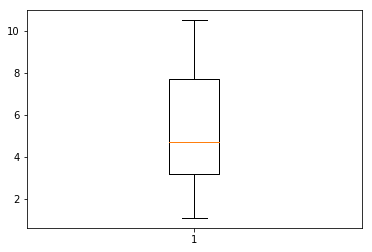

In [61]:
plt.boxplot(sal_hike.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x1715ae48ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1715ae517f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1715ae48940>],
 'medians': [<matplotlib.lines.Line2D at 0x1715ae51d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1715ae5a550>],
 'means': []}

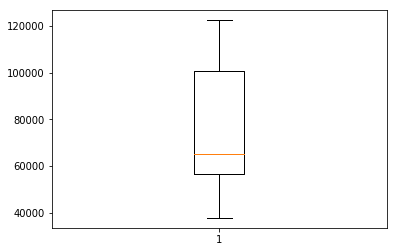

In [62]:
plt.boxplot(sal_hike.Salary)

In [63]:
sal_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


(array([3., 1., 1., 1., 5., 2., 3., 1., 0., 0., 2., 0., 1., 1., 1., 1., 2.,
        2., 1., 2.]),
 array([ 37731.,  41964.,  46197.,  50430.,  54663.,  58896.,  63129.,
         67362.,  71595.,  75828.,  80061.,  84294.,  88527.,  92760.,
         96993., 101226., 105459., 109692., 113925., 118158., 122391.]),
 <a list of 20 Patch objects>)

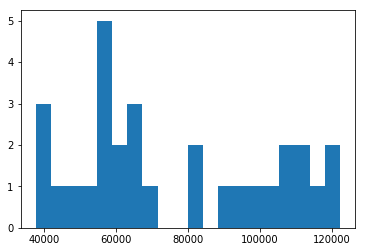

In [64]:
plt.hist(sal_hike.Salary, bins=20)

Text(0,0.5,'Salary')

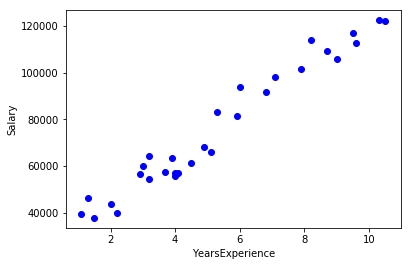

In [65]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [66]:
model6=smf.ols("Salary~YearsExperience",data=sal_hike).fit()

In [67]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.14e-20
Time:                        18:15:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model7=smf.ols("Salary~np.log(YearsExperience)",data=sal_hike).fit()

In [69]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           3.25e-13
Time:                        18:15:04   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model8=smf.ols("Salary~np.exp(YearsExperience)",data=sal_hike).fit()

In [71]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.72e-05
Time:                        18:15:04   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
model6.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [73]:
model7.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [74]:
model6.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [75]:
pred6 = model6.predict(sal_hike) # Predicted values of Salary using the model

Text(0,0.5,'Salary')

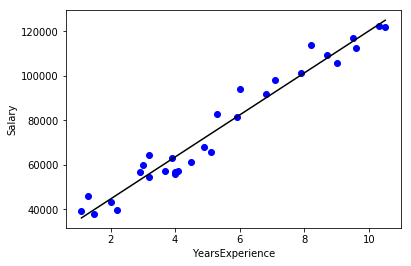

In [76]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred6,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [77]:
pred7 = model7.predict(sal_hike) # Predicted values of Salary using the model

Text(0,0.5,'Salary')

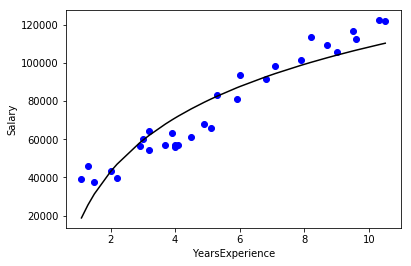

In [78]:
plt.scatter(x=sal_hike.YearsExperience, y=sal_hike.Salary, color='blue')
plt.plot(sal_hike.YearsExperience, pred7,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

#### Model6 is better than Model7.